<center><h1>Classification des chiffres manuscrits</h1></center>

## Partie 1 : Base de données, Analyse et Préparation

In [1]:
import numpy as np
import pandas as pd
import os
import cv2

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# pour masquer les messages "d'erreur"
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = f"./MNIST Dataset JPG format/MNIST - JPG - training/"
liste_label = os.listdir(path) 
print(liste_label)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [3]:
# Lire les images dans les 9 dossiers training :
data_train = []
label_train = []
for i in range(0,10):  
    path = f'./MNIST Dataset JPG format/MNIST - JPG - training/{i}'
    for filename in os.listdir(path):
        img = cv2.imread(os.path.join(path,filename))
        data_train.append(img)
        label_train.append(int(liste_label[i]))
data_train = np.array(data_train)/255.0
label_train = np.array(label_train)
print(data_train.shape)
print('************')
print(label_train.shape)

(60000, 28, 28, 3)
************
(60000,)


In [4]:
# Lire les images dans les 9 dossiers testing :
data_test = []
label_test = []
for i in range(0,10):  
    path = f'./MNIST Dataset JPG format/MNIST - JPG - testing/{i}'
    for filename in os.listdir(path):
        img = cv2.imread(os.path.join(path,filename))
        data_test.append(img)
        label_test.append(int(liste_label[i]))
data_test = np.array(data_test)/255.0      
label_test = np.array(label_test)
print(data_test.shape)
print('************')
print(label_test.shape)

(10000, 28, 28, 3)
************
(10000,)


## Partie 2 : Architecture CNN sur Tensorflow

- **Vérifier les données**

In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


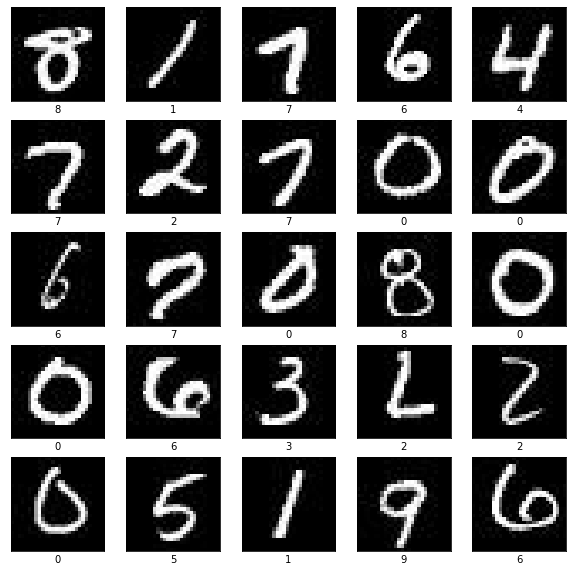

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    nbr = np.random.randint(0, 60000, [1])
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data_train[nbr[0]])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(label_train[nbr[0]])
plt.show()


- **Créer la base convolutive**

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [8]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

- **Ajouter des couches denses sur le dessus**

In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

- **Compiler et entraîner le modèle**

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(data_train, label_train, epochs=14,
                    validation_data=(data_test, label_test))


Epoch 1/14
1875/1875 [==============================] - 43s 22ms/step - loss: 0.1267 - accuracy: 0.9611 - val_loss: 0.0416 - val_accuracy: 0.9867
Epoch 2/14
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0438 - accuracy: 0.9865 - val_loss: 0.0472 - val_accuracy: 0.9844
Epoch 3/14
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0317 - accuracy: 0.9900 - val_loss: 0.0314 - val_accuracy: 0.9892
Epoch 4/14
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0247 - accuracy: 0.9919 - val_loss: 0.0355 - val_accuracy: 0.9888
Epoch 5/14
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0186 - accuracy: 0.9941 - val_loss: 0.0294 - val_accuracy: 0.9916
Epoch 6/14
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0165 - accuracy: 0.9949 - val_loss: 0.0468 - val_accuracy: 0.9866
Epoch 7/14
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0133 - accuracy: 0.9956 - val_loss: 0.0289 -

In [13]:
history

- **Évaluer le modèle**

313/313 - 2s - loss: 0.0543 - accuracy: 0.9897 - 2s/epoch - 6ms/step


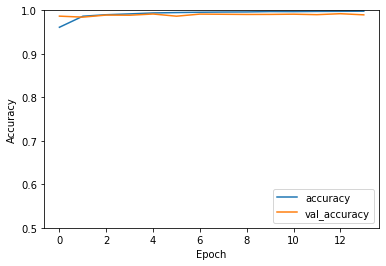

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(data_test, label_test, verbose=2)


In [15]:
test_acc

0.9897000193595886

In [16]:
test_loss

0.0542597770690918

### Mettre en place la solution dans l’application de test de personnalité

In [17]:
filepath='./modelCNN'
tf.keras.models.save_model(model, filepath, overwrite=True,
                           include_optimizer=True, save_format=None,
                           signatures=None, options=None, save_traces=True)
loaded_model = tf.keras.models.load_model(filepath)


INFO:tensorflow:Assets written to: ./modelCNN\assets


## Partie 3 : Tester l’efficacité du modèle

In [20]:
path = "./images/"
liste_num = os.listdir(path) 
print(liste_num) 

['01.jpg', '02.jpg', '03.jpg', '04.jpg', '11.jpg', '12.jpg', '21.jpg', '22.jpg', '31.jpg', '32.jpg', '33.jpg', '41.jpg', '42.jpg', '61.jpg', '62.jpg', '63.jpg', '71.jpg', '72.jpg', '73.jpg', '74.jpg', '81.jpg', '82.jpg', '83.jpg', '91.jpg', '92.jpg']


Nom du fichier (*.jpg) :42


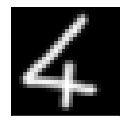

Prédiction : 4


In [22]:
%run dechiffrage.py

### Regardons les prédictions sur les images ajoutées

In [23]:
# Lire les image d'un dossier :
path = './images'
essai_data = []
for filename in os.listdir(path):
    img = cv2.imread(os.path.join(path,filename))
    essai_data.append(img)

essai_data = np.array(essai_data)/255.0
essai_noms = np.array(liste_num)


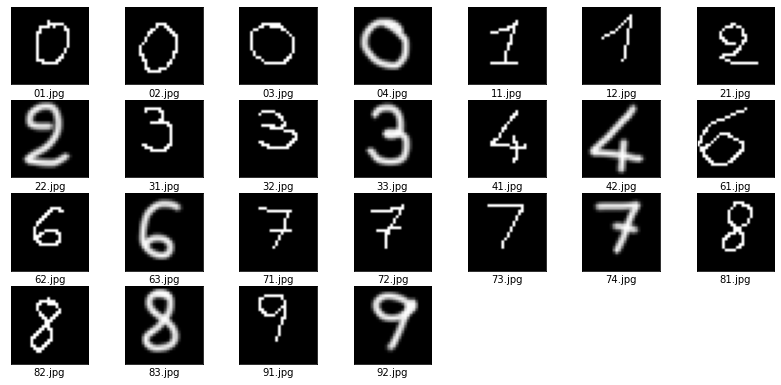

In [24]:
plt.figure(figsize=(14,10))
for i in range(25):
    #nbr = np.random.randint(0, 25, [1])
    plt.subplot(6,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    #plt.imshow(essai_data[nbr[0]])
    #plt.xlabel(essai_noms[nbr[0]])
    plt.imshow(essai_data[i])
    plt.xlabel(essai_noms[i])
plt.show()

In [44]:
# modele prédictif (softmax)
pred = loaded_model.predict(essai_data, batch_size=10)


In [45]:
reel = []
predit = []
resultat = []
for i in range(len(pred)):
    reeli = essai_noms[i][0]
    prediti = liste_label[np.argmax(pred[i], axis=0)]
    reel.append(reeli)
    predit.append(prediti)
    #print("réel : ", essai_noms[i][0])
    #print("prédit :",class_names[np.argmax(pred[i], axis=0)])
    #print("**********")
    if reeli == prediti:
        resultat.append(True)
    else:
            resultat.append(False)
        
resultats = pd.DataFrame({'Réel':reel, 'Prédit':predit , 'Résultat':resultat})
resultats

,Réel,Prédit,Résultat
0,0,0,True
1,0,0,True
2,0,0,True
3,0,3,False
4,1,1,True
5,1,1,True
6,2,2,True
7,2,2,True
8,3,2,False
9,3,2,False


In [46]:
resultats['Résultat'].value_counts()

True     15
False    10
Name: Résultat, dtype: int64

**=> les résultats ne sont pas concluants**